In [1]:
##Visulaization

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
df = pd.read_csv('global_sea_level_rise.csv')

In [4]:
df.head()

,Unnamed: 0,date,gmsl,co2ppm,gt_anomalies
0,0,1993-01-01,-48.0,356.37,0.36
1,1,1993-02-01,-46.6,356.40,0.38
2,2,1993-03-01,-46.3,356.51,0.41
3,3,1993-04-01,-43.8,356.66,0.31
4,4,1993-05-01,-45.7,356.72,0.35


In [5]:
df=df.drop('Unnamed: 0',1)
df=df.drop('co2ppm',1)
df=df.drop('gt_anomalies',1)

/var/folders/78/j0fdp8yn5_5dc6t0dnytkg5h0000gn/T/ipykernel_57226/468860647.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Unnamed: 0',1)
/var/folders/78/j0fdp8yn5_5dc6t0dnytkg5h0000gn/T/ipykernel_57226/468860647.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('co2ppm',1)
/var/folders/78/j0fdp8yn5_5dc6t0dnytkg5h0000gn/T/ipykernel_57226/468860647.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('gt_anomalies',1)


In [6]:
df.head()

,date,gmsl
0,1993-01-01,-48.0
1,1993-02-01,-46.6
2,1993-03-01,-46.3
3,1993-04-01,-43.8
4,1993-05-01,-45.7


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    333 non-null    datetime64[ns]
 1   gmsl    333 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [8]:
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 1993-01-01 to 2020-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gmsl    333 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


In [9]:
df.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', name='date', length=333, freq=None)

In [10]:
df['1993':]

,gmsl
date,
1993-01-01,-48.0
1993-02-01,-46.6
1993-03-01,-46.3
1993-04-01,-43.8
1993-05-01,-45.7
...,...
2020-05-01,53.4
2020-06-01,54.0
2020-07-01,54.4


In [11]:
df.isnull().sum()

gmsl    0
dtype: int64

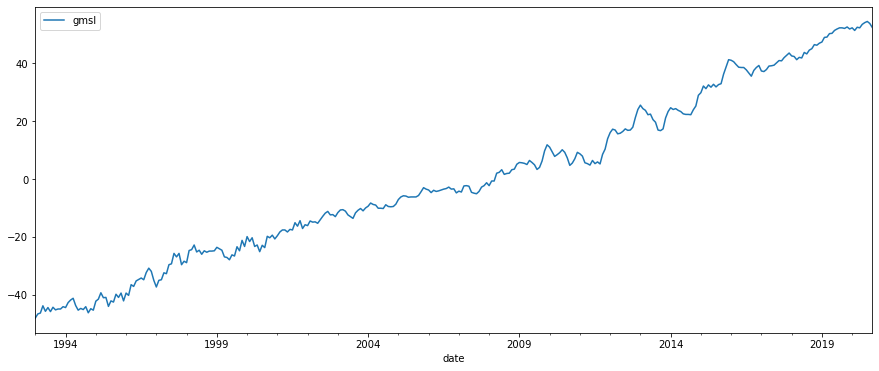

In [12]:
df.plot(figsize=(15, 6))
plt.show()

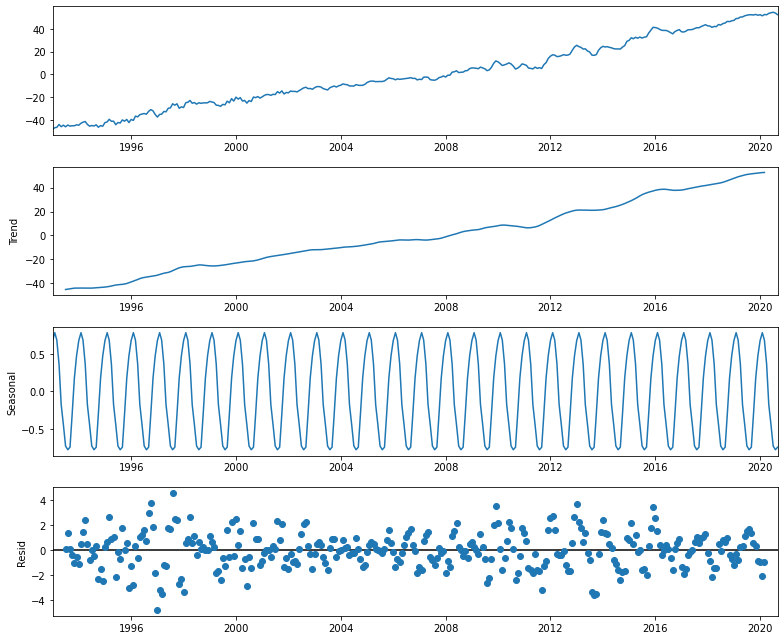

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
##step 3